In [2]:
try: 
    import engmod.structfem as sfem
except:
    print("*"*100)
    print("You must ensure that the engmod folder is the same directory as the jupyter notebook file")
    print("*"*100)    
    raise ValueError("You have to fix this")

import numpy as np
import scipy.optimize as sciopt
import scipy.linalg as slin
import matplotlib.pyplot as plt 

print("Successfully imported all modules")

Successfully imported all modules


In [8]:
node_coordinates = np.array([
                             [0,0],# Node 0
                             [4,0],# Node 1
                             [8,0],# Node 2
                             [4,3],# Node 4
                             ])

elem_connectivity = np.array([
                              [0,1], #0
                              [0,3], #1
                              [1,3], #2 
                              [1,2], #3
                              [2,3], #4
                              ])

prescribed_displacement = np.array([
                                   [0,0,0], # Node 0, Direction 0, Value = 0
                                   [0,1,0], # Node 0, Direction 1, Value = 0
                                   [2,0,0], # Node 0, Direction 0, Value = 0
                                   [2,1,0], # Node 0, Direction 1, Value = 0
                                    ])

theta = np.pi/4
prescribed_force = np.array([
                            [3,0,2E5 * np.sin(theta)],
                            [3,1,-2E5 * np.cos(theta)],  
                            ])

A = 0.002 
E = 200E9
rho = 7800
elemprop = {
    "A": np.ones(5)*A,
    "E": np.ones(5)*E,
    "density": np.ones(5) * rho
     }

tmn = sfem.FEM_Truss_2D(node_coordinates,            # The coordinates of each node
                            elem_connectivity,       # The connectivity of the nodes to form elements
                            prescribed_displacement, # The prescribed displacements
                            prescribed_force,        # The prescribed loads
                            elemprop)   

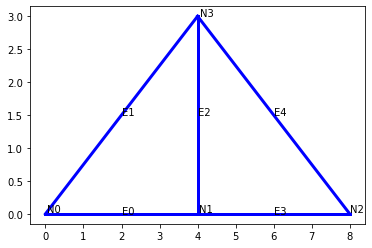

In [9]:
tmn.plot_system()

In [10]:
tmn.solve()

{'displacements': array([ 0.00000000e+00,  0.00000000e+00, -5.67343574e-37, -2.45523188e-03,
         0.00000000e+00,  0.00000000e+00,  1.38106793e-03, -2.45523188e-03]),
 'loads': array([  23570.22603955,   17677.66952966,       0.        ,
              0.        , -164991.58227686,  123743.68670765,
         141421.35623731, -141421.35623731])}

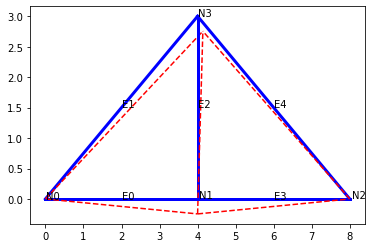

In [17]:
tmn.plot_system(show_displacement=True,magnification=100)